In [16]:
from gprofiler import GProfiler
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

df = pd.read_csv("/home/mouren/Data/final_files_tokeep/final_catalogs/coding_exons_bilan_ovlpTF_NR_cCREs_FANTOM5+Enh_NonCoding_TSS_TES_UTR5_UTR3_peakDensity_density50pb_AllSummitsPeaksDensitySum_correl_DnaseEncodeChipAtlas_ATAC.bed", sep="\t", header=None) 

df[29] = df[29].str.replace(',', '.')
df[29] = pd.to_numeric(df[29])

bins = np.arange(0, 110, 10)
bin_labels = [f"{i}-{i+10}%" for i in range(0, 100, 10)]

df["category"] = pd.cut(df[29], bins=bins, labels=bin_labels, right=False)
counts = df["category"].value_counts().sort_index()

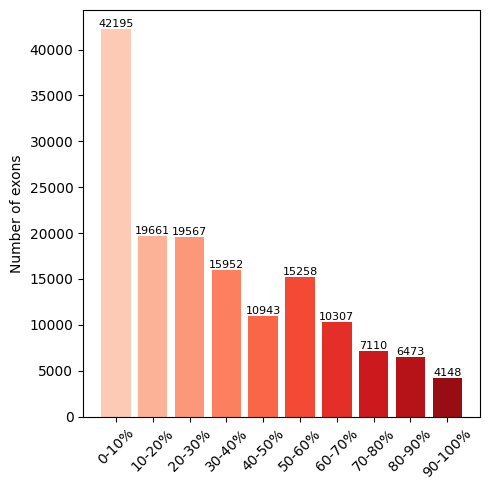

In [17]:
colors = plt.cm.Reds(np.linspace(0.2, 0.9, 10))

fig, ax = plt.subplots(figsize=(5, 5))

# Plot the bars
bars = ax.bar(counts.index, counts.values, color=colors, width=0.8)

# Annotate the count above each bar
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate: center of the bar
        height,                            # y-coordinate: just at the top of the bar
        str(height),                       # the text (count value)
        ha='center', 
        va='bottom',
        fontsize=8
    )

# Add titles and labels
ax.set_xlabel(None)
ax.set_ylabel("Number of exons")
plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()

plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_mat_met/ratio_summits_tf_tf_peaks_hsap.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_mat_met/ratio_summits_tf_tf_peaks_hsap.png", format="png", bbox_inches="tight", dpi=450)


plt.show()